In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import mglearn.plots

0.8.0


In [2]:
def calculateLuminosity(stellar_luminosity):
    return (10.0 ** ((stellar_luminosity - 4.72) / -2.5))
def calculateInnerHabZone(stellar_luminosity):
    return ((calculateLuminosity(stellar_luminosity) / 1.1) ** 0.5)
def calculateOuterHabZone(stellar_luminosity):
    return ((calculateLuminosity(stellar_luminosity) / 0.53) ** 0.5)

In [3]:
habitable_planets = np.array(["Teegarden's Star b", "TOI-700 d", "K2-72 e", "TRAPPIST-1 d", "Kepler-1649 c", 
          "Proxima Cen b", "GJ 1061 d", "GJ 1061 c", "Ross 128 b", "GJ 273 b", "TRAPPIST-1 e", "Kepler-442 b",
            "Wolf 1061 c", "GJ 667 C c", "GJ 667 C f", "Kepler-1229 b", "TRAPPIST-1 f", "Kepler-62 f", "Teegarden's Star c", "Kepler-186 f", "GJ 667 C e", 
            "tau Cet f", "TRAPPIST-1 g", "GJ 682 b", "Kepler-452 b", "Kepler-62 e", "Kepler-1652 b", "Kepler-1544 b",
            "Kepler-296 e", "Kepler-283 c", "K2-296 b", "Kepler-1410 b", "K2-3 d", "Kepler-1638 b", "Kepler-296 f",
            "Kepler-440 b", "Kepler-705 b", "Kepler-1653 b", "GJ 832 c", "Kepler-1606 b", "Kepler-1090 b", "Kepler-61 b",
            "K2-18 b", "Kepler-443 b", "Kepler-1701 b", "Kepler-22 b", "LHS 1140 b", "Kepler-1552 b", "K2-9 b", 
            "Kepler-1540 b", "GJ 180 c", "Kepler-1632 b", "Kepler-298 d", "GJ 163 c", "HD 40307 g", "K2-288 B b", "GJ 3293 d", "GJ 229 A c", "Kepler-174 d", "GJ 357 d"
          ])

In [4]:
exoplanets = pd.read_csv("exoplanets3.csv", sep=",")
training_data = np.array(exoplanets[:])


In [5]:
exoplanets

,pl_name,sy_snum,sy_pnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,...,st_rad,st_mass,st_met,st_lum,st_logg,st_age,st_dens,st_vsin,st_rotp,st_radv
0,11 Com b,2,1,0,326.030000,1.290000,12.1,1.08,6165.6000,19.4000,...,19.00,2.70,-0.350,2.243,2.31,NaN,NaN,1.2,NaN,43.37
1,11 UMi b,1,1,0,516.219970,1.530000,12.3,1.09,4684.8142,14.7400,...,29.79,2.78,-0.020,2.430,1.93,1.56,NaN,1.5,NaN,-17.52
2,14 And b,1,1,0,185.840000,0.830000,12.9,1.15,1525.5000,4.8000,...,11.00,2.20,-0.240,1.763,2.63,4.50,NaN,2.6,NaN,-59.73
3,14 Her b,1,2,0,1773.400020,2.930000,12.9,1.15,1481.0878,4.6600,...,0.93,0.90,0.410,-0.153,4.45,3.90,1.27393,1.0,NaN,-13.82
4,16 Cyg B b,3,1,0,798.500000,1.660000,13.5,1.20,565.7374,1.7800,...,1.13,1.08,0.060,0.097,4.36,7.40,1.01103,2.7,NaN,-28.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,tau Gem b,1,1,0,305.500000,1.170000,12.1,1.08,6547.0000,20.6000,...,26.80,2.30,0.140,2.519,1.96,1.22,NaN,1.0,NaN,22.02
4420,ups And b,2,3,0,4.617033,0.059222,14.0,1.25,218.5310,0.6876,...,1.56,1.30,0.101,0.525,4.13,5.00,0.36993,9.2,12.0,-28.66
4421,ups And c,2,3,0,241.258000,0.827774,13.4,1.19,629.5950,1.9810,...,1.56,1.30,0.101,0.525,4.13,5.00,0.36993,9.6,12.0,-28.66
4422,ups And d,2,3,0,1276.460000,2.513290,13.0,1.16,1313.2200,4.1320,...,1.56,1.30,0.101,0.525,4.13,5.00,0.36993,9.6,12.0,-28.66


In [6]:
habitable_x = np.array([np.array(training_data[0, :])])
habitable_y = np.array([0])
uninhabitable_x = np.array([np.array(training_data[0, :])])
uninhabitable_y = np.array([0])

for i in training_data:
    if i[0] in habitable_planets:
        habitable_x = np.append(habitable_x, np.array([np.array(i)]), axis=0)
        habitable_y = np.append(habitable_y, 1)

for i in training_data:
    if i[0] not in habitable_planets:
        uninhabitable_x = np.append(uninhabitable_x, np.array([np.array(i)]), axis=0)
        uninhabitable_y = np.append(uninhabitable_y, 0)

training_x = np.append(habitable_x[:, 1:], uninhabitable_x[:, 1:], axis=0)
training_y = np.append(habitable_y, uninhabitable_y, axis=0)

habitable_x = habitable_x[:, 1:]
uninhabitable_x = uninhabitable_x[:, 1:]

print(habitable_x.shape, uninhabitable_x.shape, training_x.shape)
print(habitable_y.shape, uninhabitable_y.shape, training_y.shape)

(60, 25) (4366, 25) (4426, 25)
(60,) (4366,) (4426,)


In [13]:
training_x = np.asarray(training_x).astype(np.float32)
training_x = np.where(np.isnan(training_x), ma.array(training_x, mask=np.isnan(training_x)).mean(axis=0), training_x)
habitable_x = np.asarray(habitable_x).astype(np.float32)
habitable_x = np.where(np.isnan(habitable_x), ma.array(habitable_x, mask=np.isnan(habitable_x)).mean(axis=0), habitable_x)
uninhabitable_x = np.asarray(uninhabitable_x).astype(np.float32)
uninhabitable_x = np.where(np.isnan(uninhabitable_x), ma.array(uninhabitable_x, mask=np.isnan(uninhabitable_x)).mean(axis=0), uninhabitable_x)

In [14]:
oversample = SMOTE()
x_res, y_res = oversample.fit_resample(training_x, training_y)
print(x_res.shape, y_res.shape)


(8734, 25) (8734,)


In [15]:
print("OG dataset shape: {}".format(Counter(training_y)))
print("New dataset shape: {}".format(Counter(y_res)))

OG dataset shape: Counter({0: 4367, 1: 59})
New dataset shape: Counter({0: 4367, 1: 4367})


In [16]:
os = SMOTE(sampling_strategy = 1)
x_train_res, y_train_res = os.fit_resample(training_x, training_y)
print(x_train_res.shape, y_train_res.shape)

(8734, 25) (8734,)


In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
model=knn.fit(x_train_res, y_train_res)
print("Training set score: {:.2f}".format(knn.score(training_x, training_y)))

Training set score: 0.98


C:\Users\Derek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


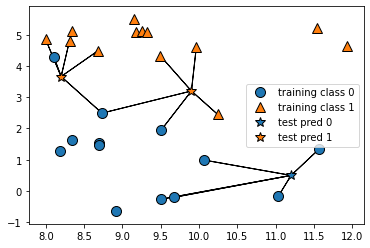

In [34]:
mglearn.plots.plot_knn_classification(n_neighbors=5)
plt.show()